# conditional PDF of bias of the coin given K=k heads in n tosses

$$f_{Q|K} (q, k) = c q^k (1-q)^{n-k}, 0 < q < 1$$

* K is the number of heads in n tosses
* q is the probability that a coin toss results in the head
* c is the normalizing constant $\frac{(n+1)!}{k!(n-k)!} $


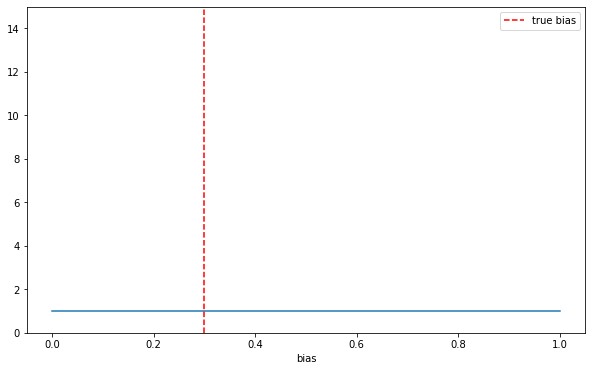

MovieWriter ffmpeg unavailable; using Pillow instead.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

q = np.linspace(0, 1, 200)
total_tosses = 200
true_bias = 0.3
num_head = 0
num_heads = [0] 

# coin flip observations
for _ in range(total_tosses):
    is_head = 1 if np.random.random() <= true_bias else 0
    num_head += is_head
    num_heads.append(num_head)

def generate_PDF(n):
    # generate the conditional PDF of bias given K=num_heads in i tosses
    num_head = num_heads[n]
    num_tail = n - num_head
    normalizing_const = np.math.factorial(n+ 1)/(np.math.factorial(num_head)*np.math.factorial(num_tail))    
    pdf = normalizing_const * (q**num_head) * ((1-q)**num_tail)
    
    return pdf

def update(i):
    # update the conditional PDF
    pdf = generate_PDF(i)
    line.set_ydata(pdf)
    ax.set_title(f'Conditional PDF of bias of the coin given K={num_heads[i]} heads in {i} tosses')
    return line

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0, 15])
ax.set_xlabel('bias')

line, = ax.plot(q, generate_PDF(0))
ax.axvline(x=true_bias, color='r', linestyle='--', label='true bias')
ax.legend()
plt.show()

animation = FuncAnimation(fig=fig, func=update, frames=total_tosses+1, interval=100)
animation.save('coin_flips.gif')

# display the animation in the notebook
HTML(animation.to_jshtml())